# Load Images

In [337]:
from itertools import chain
import glob

classes = [
 'n02111889-Samoyed',
 'n02098286-West_Highland_white_terrier',
 'n02085782-Japanese_spaniel',
 'n02088466-bloodhound'
]

dog_images = list(chain.from_iterable([glob.glob(f'./Images/{cls}/*') for cls in classes]))
annotations = list(chain.from_iterable([glob.glob(f'./Annotation/{cls}/*') for cls in classes]))

print('length of dog images: ', len(dog_images))
print('length of annotations: ', len(annotations))

length of dog images:  759
length of annotations:  759


# Create Dataset of grayscale pixel intensity histograms

In [338]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

import re

X = []
y = []

for image_path in dog_images:
    # Create Grayscale Histogram
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0,255]).flatten()

    # Extract label from file path
    label = re.search('./Images/(.+?)/', image_path).group(1)

    X.append(histogram)
    y.append(label)

X = np.array(X)
y = np.array(y)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Perform Standardization

In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Dataset Into Testing and Training Set

In [340]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Perform Standard and Stratified Cross Validation

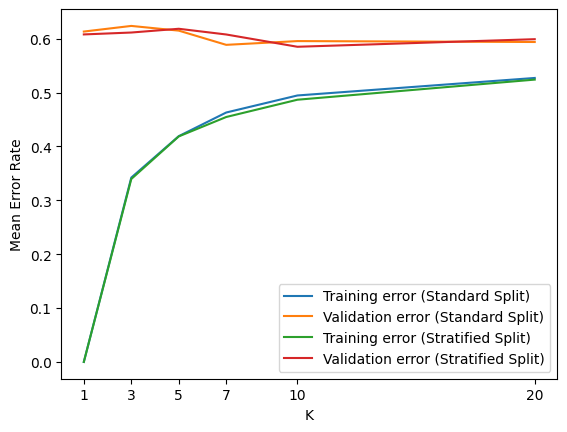

The value of k that minimizes the standard split training error is: 1
The value of k that minimizes the standard split validation error is: 7
The value of k that minimizes the stratified split training error is: 1
The value of k that minimizes the stratified split validation error is: 10

1) The lower the value of k, the more complex the model is.
2) For low values of k, the model is overfitting. The standard and statified validation error        
is lowest with k = 7 or k = 10 respectively. For higher k values, the model is underfitting.

Test error for ideal k value (10): 0.5736842105263158


In [341]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 10, 20]

mean_training_errors_standard = []
mean_validation_errors_standard = []

mean_training_errors_stratified = []
mean_validation_errors_stratified = []

standard_splitter = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    classifier = KNeighborsClassifier(k)
    cv_scores_standard = cross_validate(classifier, X_train, y_train, cv=standard_splitter, return_train_score=True)
    cv_scores_stratified = cross_validate(classifier, X_train, y_train, cv=stratified_splitter, return_train_score=True)

    train_error_standard = 1 - cv_scores_standard['train_score']
    validation_error_standard = 1 - cv_scores_standard['test_score']
    train_error_stratified = 1 - cv_scores_stratified['train_score']
    validation_error_stratified = 1 - cv_scores_stratified['test_score']

    mean_training_errors_standard.append(train_error_standard.mean())
    mean_validation_errors_standard.append(validation_error_standard.mean())
    mean_training_errors_stratified.append(train_error_stratified.mean())
    mean_validation_errors_stratified.append(validation_error_stratified.mean())

plt.plot(k_values, mean_training_errors_standard, label='Training error (Standard Split)')
plt.plot(k_values, mean_validation_errors_standard, label='Validation error (Standard Split)')
plt.plot(k_values, mean_training_errors_stratified, label='Training error (Stratified Split)')
plt.plot(k_values, mean_validation_errors_stratified, label='Validation error (Stratified Split)')
plt.xlabel('K')
plt.xticks(k_values)
plt.ylabel('Mean Error Rate')
plt.legend()
plt.show()

print(f"The value of k that minimizes the standard split training error is: {k_values[np.argmin(np.array(mean_training_errors_standard))]}")
print(f"The value of k that minimizes the standard split validation error is: {k_values[np.argmin(np.array(mean_validation_errors_standard))]}")
print(f"The value of k that minimizes the stratified split training error is: {k_values[np.argmin(np.array(mean_training_errors_stratified))]}")
print(f"The value of k that minimizes the stratified split validation error is: {k_values[np.argmin(np.array(mean_validation_errors_stratified))]}")
print()
print("1) The lower the value of k, the more complex the model is.")
print("2) For low values of k, the model is overfitting. The standard and statified validation error\
        \nis lowest with k = 7 or k = 10 respectively. For higher k values, the model is underfitting.\n")

# Evaluate classifier on test set using ideal choice for k
ideal_k = k_values[np.argmin(np.array(mean_validation_errors_stratified))]
classifier = KNeighborsClassifier(ideal_k).fit(X_train, y_train)
print(f"Test error for ideal k value ({ideal_k}): {1 - classifier.score(X_test, y_test)}")


# Performance Comparison

## Models: 
**Decision Tree:** DecisionTreeClassifier with parameter max depth=10 and default values for
the other parameters

**Neural Network:** MLPClassifier with parameter ℎ𝑖𝑑𝑑𝑒𝑛 𝑙𝑎𝑦𝑒𝑟 𝑠𝑖𝑧𝑒𝑠 = (10, 10, 10, ) (i.e., 3
hidden layers with 10 nodes each) and default values for the other parameters.

**Adaboost** AdaBoostClassifier with default parameters.


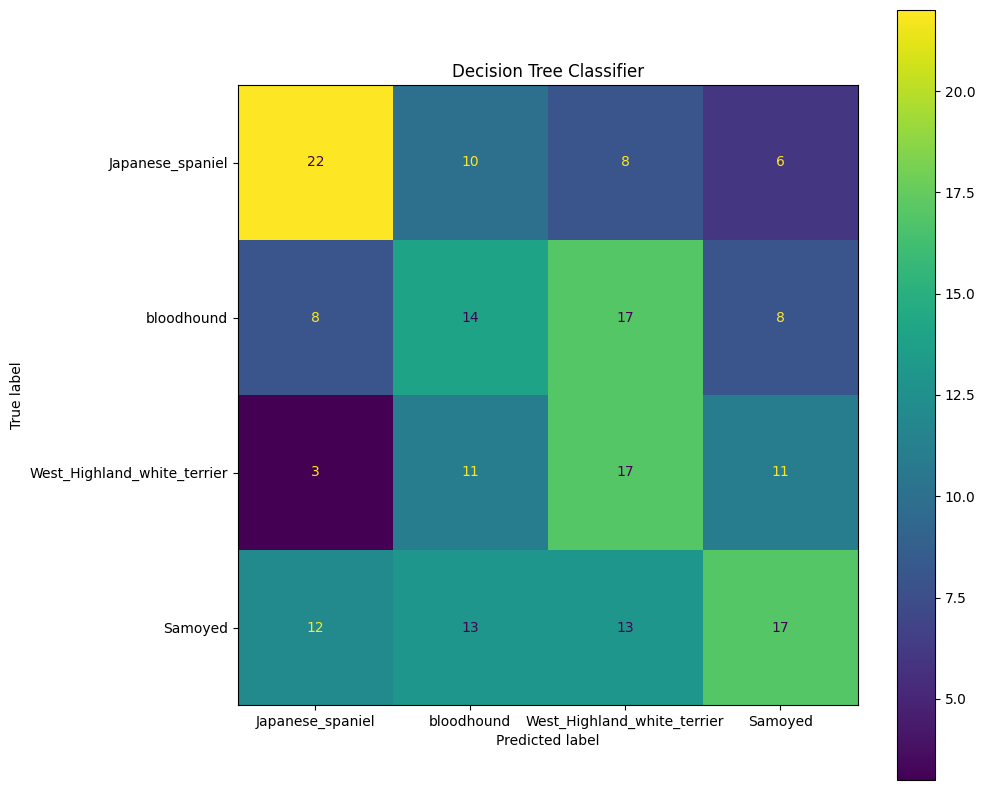

Mean validation accuracy: 0.37432075764632816


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

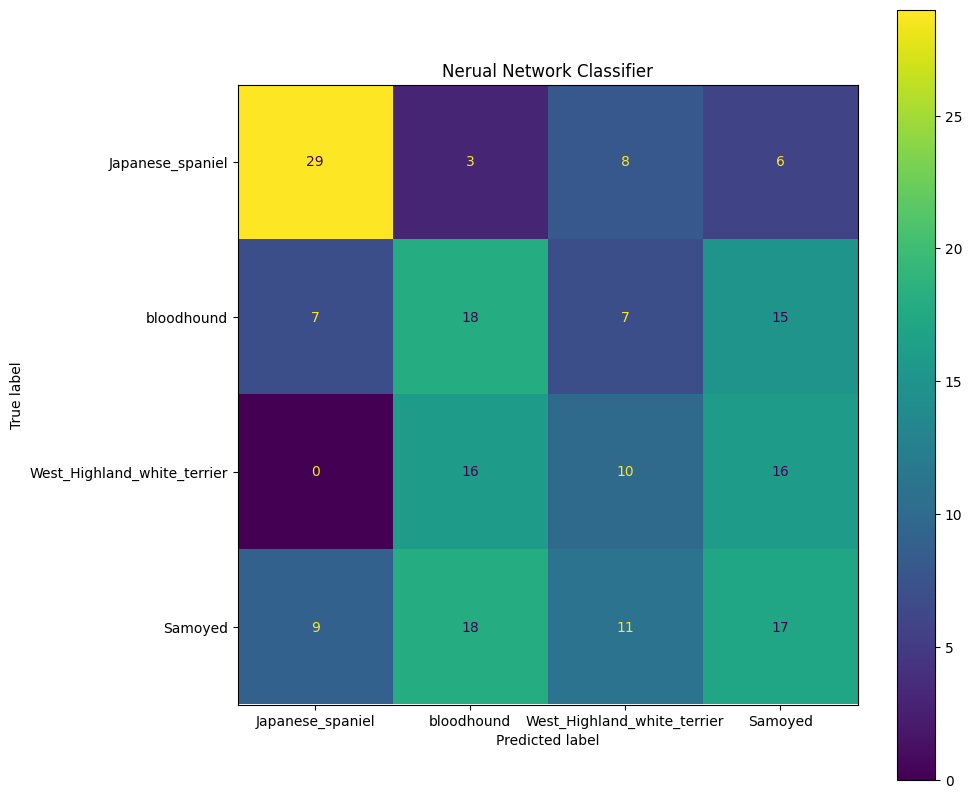

Mean validation accuracy: 0.40431609998447443


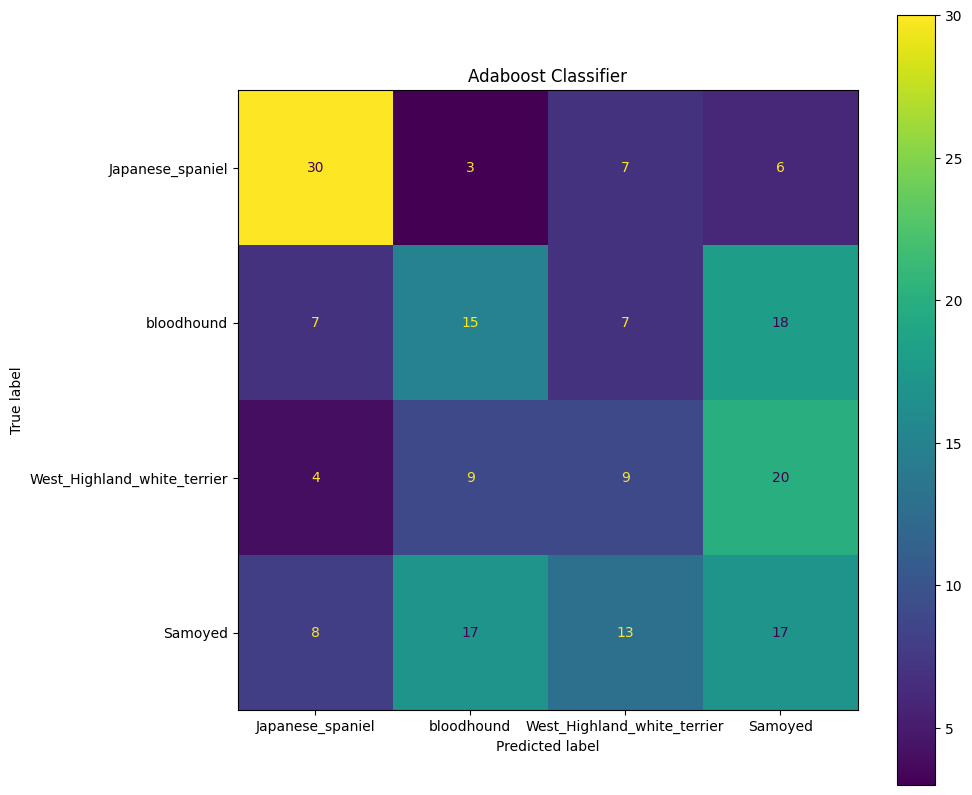

Mean validation accuracy: 0.3726905759975159

1) Based on the confusion matrices, I believe the devision tree classifier is the best method based on the fact that      
for each column in the matrix, the number of correct predictions for the correct class is greater than or equal      
to the number of predictions for each incorrect class.

2) Based on the mean validation accuracies, the neural network is the best method.

3)
Decision Tree Classifier test accuracy:  0.3684210526315789
Nerual Network Classifier test accuracy:  0.3894736842105263
Adaboost Classifier test accuracy:  0.3736842105263158
Based on the test accuracies, the neural network is the best method.

4)
Decision Tree Classifier f measure:  0.3684210526315789
Nerual Network Classifier f measure:  0.3894736842105263
Adaboost Classifier f measure:  0.3736842105263158
Based on the f measures, the neural network is the best method.



In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
classifiers = {
    "Decision Tree Classifier" : DecisionTreeClassifier(max_depth=10, random_state=42),
    "Nerual Network Classifier" : MLPClassifier(hidden_layer_sizes=(10,10,10), random_state=42),
    "Adaboost Classifier" : AdaBoostClassifier(random_state=42)
}


display_labels = list(label_encoder.inverse_transform(np.unique(y)))
display_labels = list(map(lambda label : label.split('-')[1], display_labels))

for name, classifier in classifiers.items():
    cv_scores = cross_validate(classifier, X_train, y_train, cv=stratified_splitter)
    mean_validation_accuracy = cv_scores['test_score'].mean()
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    fig, ax = plt.subplots(figsize=(10, 10))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=display_labels, ax=ax)
    plt.title(name)
    plt.show()
    print("Mean validation accuracy:", mean_validation_accuracy)

print()
print("1) Based on the confusion matrices, I believe the devision tree classifier is the best method based on the fact that\
      \nfor each column in the matrix, the number of predictions for the correct class is greater than or equal\
      \nto the number of predictions for each incorrect class.")
print()
print("2) Based on the mean validation accuracies, the neural network is the best method.\n")

print("3)")
for name, classifier in classifiers.items():
    print(f"{name} test accuracy: ", classifier.score(X_test, y_test))

print("Based on the test accuracies, the neural network is the best method.\n")

print("4)")
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    print(f"{name} f measure: ", f1_score(y_test, y_pred, average='micro'))
print("Based on the f measures, the neural network is the best method.\n")




    
